# HaccyTrees - Luminous Mergers

In [1]:
import haccytrees.mergertrees
import numpy as np
import math
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func_haccytrees

plt.rcParams.update({
    "text.usetex": True,
    'font.size': 14,
    "figure.figsize": (6.25, 3.75)
})

pyfftw not available, using numpy fft


In [2]:
%%time
forest, progenitor_array = haccytrees.mergertrees.read_forest(
    '/data/a/cpac/mbuehlmann/LastJourney/forest/target_forest_aurora.hdf5',
    'LastJourney', nchunks=1, chunknum=0, #mass_threshold = 2.7*10**11,
    include_fields = ["tree_node_mass", "snapnum", "fof_halo_tag", "sod_halo_cdelta", "fof_halo_center_x", "fof_halo_center_y", "fof_halo_center_z"]
)

CPU times: user 6.58 s, sys: 8.84 s, total: 15.4 s
Wall time: 15.4 s


In [3]:
%%time
fg_forest, fg_progenitor_array = haccytrees.mergertrees.read_forest(
    "/data/a/cpac/mbuehlmann/LastJourney/forest/fg_forest.hdf5",
    'LastJourney',
    #mass_threshold=5e11 # Is this for mergers, or "particle size"? (might be the wrong word)
)

CPU times: user 22.9 s, sys: 41.7 s, total: 1min 4s
Wall time: 1min 4s


### Establish Globals

In [4]:
sim = haccytrees.Simulation.simulations['LastJourney']
redshifts = np.flip(sim.step2z(np.array(sim.cosmotools_steps)))
print(redshifts)
xaxis = 'z_nums'
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
# Convert snapshots to redshifts -- opposite order (chronological)
redshifts = np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00])
print(redshifts)

[2.22044605e-16 2.44648318e-02 5.01567398e-02 7.48663102e-02
 1.00766703e-01 1.27946128e-01 1.53846154e-01 1.83745583e-01
 2.12303981e-01 2.42274413e-01 2.70543616e-01 3.03501946e-01
 3.34661355e-01 3.63636364e-01 4.01673640e-01 4.33666191e-01
 4.71449488e-01 5.02242152e-01 5.39050536e-01 5.77708006e-01
 6.18357488e-01 6.55683690e-01 6.94772344e-01 7.35751295e-01
 7.78761062e-01 8.23956443e-01 8.64564007e-01 9.14285714e-01
 9.59064327e-01 1.00598802e+00 1.05521472e+00 1.10691824e+00
 1.15203426e+00 1.20879121e+00 1.25842697e+00 1.32101617e+00
 1.37588652e+00 1.43341404e+00 1.49379653e+00 1.54430380e+00
 1.61038961e+00 1.68000000e+00 1.73841962e+00 1.79944290e+00
 1.87965616e+00 1.94721408e+00 2.01801802e+00 2.09230769e+00
 2.17034700e+00 2.25242718e+00 2.31683168e+00 2.40677966e+00
 2.47750865e+00 2.57651246e+00 2.65454545e+00 2.73605948e+00
 2.85057471e+00 2.94117647e+00 3.03614458e+00 3.10204082e+00
 3.20502092e+00 3.31330472e+00 3.42731278e+00 3.54751131e+00
 3.63133641e+00 3.763033

## Mass Matching - Narrow Bins

In [5]:
# Make masks
fg_masks = help_func_haccytrees.make_masks(fg_forest)
print(len(forest['tree_node_mass'][forest['snapnum'] == 100]))
halo_masks = help_func_haccytrees.make_masks(forest) # Forest should already only contain values in these bins
print(len(halo_masks[0][halo_masks[0]]) + len(halo_masks[1][halo_masks[1]]) + len(halo_masks[2][halo_masks[2]]))

307993
307993


### Find QH Candidates

In [7]:
qh_masks = []
for this_mask in (fg_masks):
    fg_idx = np.nonzero(this_mask)[0]
    mainbranch_index, mainbranch_masses = help_func_haccytrees.get_branches(fg_idx, fg_forest)
    mainbranch_mergers = help_func_haccytrees.get_mainbranch_mergers(fg_forest, fg_progenitor_array, mainbranch_index)
    major_mergers = help_func_haccytrees.get_major_mergers(mainbranch_mergers)
    lmm_redshift = help_func_haccytrees.get_lmms(major_mergers)
    fgs, qhs, mrich = help_func_haccytrees.find_specials(fg_forest, mainbranch_index, major_mergers, lmm_redshift, fg_idx)
    # This qhs index will be an index associated with this specific mass bin/this fg mask. Is there any reason to have a mask version? Maybe, because of later...
    qh_mask = np.zeros_like(this_mask)
    qh_mask[qhs] = 1
    qh_masks.append(qh_mask)

## LMM Stats

/home/acossairt/miniconda3/envs/fossil_groups_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/acossairt/miniconda3/envs/fossil_groups_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


IndexError: list index out of range

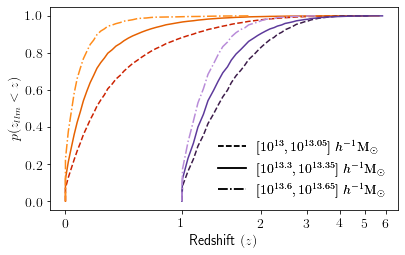

In [8]:
z_end = None # In case you want to zoom in
#colors = ["#5D3A9B", "#E66100"] # "#009E73"
color_labels = ["all halos", "FG candidates"]
oranges = ["#CC2200", "#E66100", "#FF8C1A"]
purples = ["#3C1C4A", "#5D3A9B", "#B98CD9"]
greens = ["#00755F", "#00805D"]
colors = iter([oranges, purples, greens])
linestyles = ['--', '-', '-.']
linestyle_labels = [r"$[10^{13}, 10^{13.05}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.3}, 10^{13.35}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.6}, 10^{13.65}]$ $h^{-1}\mathrm{M}_\odot$"]

fig, ax = plt.subplots()
bin_legend_handles = []
for i, (this_mask, catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks, qh_masks], [forest, fg_forest, fg_forest], [progenitor_array, fg_progenitor_array, fg_progenitor_array])):
    
    # Get lmms for all entries in this mask
    this_idx = [np.nonzero(this_mask[0])[0], np.nonzero(this_mask[1])[0], np.nonzero(this_mask[2])[0]]
    mainbranch_index, mainbranch_mass = help_func_haccytrees.get_binned_branches(this_idx, catalog)
    binned_mainbranch_mergers = help_func_haccytrees.get_binned_mainbranch_mergers(catalog, this_progenitor_array, mainbranch_index)
    binned_major_mergers = help_func_haccytrees.get_binned_major_mergers(binned_mainbranch_mergers)
    binned_lmms = help_func_haccytrees.get_binned_lmms(binned_mainbranch_mergers)
    fgs, rugs, mrich = help_func_haccytrees.find_binned_specials(forest, mainbranch_index, binned_major_mergers, binned_lmms, this_idx)
    
    # Loop over each mass bin, plot
    these_colors = next(colors)
    for j, this_bin in enumerate(binned_lmms):
        if i == 2 and j == 2:
            break
        current_color = these_colors[j]
        current_linestyle = linestyles[j]
        current_label = linestyle_labels[j]
        
        # Calculate cdf
        this_bin = this_bin[this_bin >= 0] # Remove any negative values (coming from rugs)
        data_sorted = np.sort(this_bin) # Should automatically sort along the last axis
        hist_keys = np.concatenate(([0] if i == 0 else [1], [key for key, group in groupby(data_sorted)])) # Redshift values
        hist_values = np.concatenate(([0], [len(list(group)) for key, group in groupby(data_sorted)])) # Count of each redshift value
        cum_probs = np.cumsum(hist_values) / len(this_bin)

        if z_end is not None:
            hist_keys = np.append(hist_keys, z_end)
            cum_probs = np.append(cum_probs, cum_probs[-1])

        # Plot cdf
        ax.plot(hist_keys, cum_probs, color = current_color, linestyle = current_linestyle, label = current_label)
        
        if j == 1:
            bin_legend_handles.append(mpatches.Patch(color = current_color, label = color_labels[i])) # For mass bins
    
    # Add legend for mass bins
    if i == 0:
        fake_lines = [ax.plot([],[], linestyle = linestyle, c = 'k')[0] for linestyle in linestyles]
        leg1 = ax.legend(fake_lines, linestyle_labels, loc = 'lower right', frameon = False)
        ax.add_artist(leg1)
        
    # Accessorize
    ax.set_ylabel(r"$p(z_{llm} < z)$")
    ax.set_xlabel(r"Redshift $(z)$")
    ax.set_xscale("symlog", linthresh = 1, linscale = 0.4)
    
    # Unnecessarily Complicated Tick Marks
    stepsize = 1
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(0, end, stepsize))
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())

ax.legend(handles = bin_legend_handles, loc = "center right", frameon = False)
fig.tight_layout()
#fig.savefig("full_lj_plots/cdf_llms.pdf", bbox_inches='tight', pad_inches=0)

#### Cumulative mean number of major mergers

In [ ]:
# Fixing this up
z_end = None # In case you want to zoom in
#colors = ["#5D3A9B", "#E66100"] # "#009E73"

fig, ax = plt.subplots()
bin_legend_handles = []
oranges = ["#CC2200", "#E66100", "#FF8C1A"]
purples = ["#3C1C4A", "#5D3A9B", "#B98CD9"]
colors = iter([oranges, purples])
color_labels = ["all halos", "FG candidates"]
linestyles = ['--', '-', '-.']
linestyle_labels = [r"$[10^{13}, 10^{13.05}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.3}, 10^{13.35}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.6}, 10^{13.65}]$ $h^{-1}\mathrm{M}_\odot$"]

for i, (this_mask, this_catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks], [forest, fg_forest], [progenitor_array, fg_progenitor_array])):
    target_idx = [np.nonzero(this_mask[0])[0], np.nonzero(this_mask[1])[0], np.nonzero(this_mask[2])[0]]
    binned_mainbranch_index, binned_mainbranch_masses = help_func_haccytrees.get_binned_branches(target_idx, this_catalog)
    binned_mainbranch_mergers = help_func_haccytrees.get_binned_mainbranch_mergers(this_catalog, this_progenitor_array, binned_mainbranch_index)
    binned_major_mergers = help_func_haccytrees.get_binned_major_mergers(binned_mainbranch_mergers)
    binned_avg_cum_mms = help_func_haccytrees.calc_binned_avg_cum_mms(binned_major_mergers) # Why did this previously say "long"?
    
    # Loop over mass bins; plot
    these_colors = next(colors) # colors for each fossil status
    for j, this_bin in enumerate(binned_avg_cum_mms):
        current_color = these_colors[j]
        current_linestyle = linestyles[j]
        current_label = linestyle_labels[j]
        ax.plot(redshifts, this_bin, linestyle = current_linestyle, color = current_color, label = current_label)
        
        if j == 1:
            bin_legend_handles.append(mpatches.Patch(color = current_color, label = color_labels[i])) # For mass bins

    # Add legend for mass bins
    if i == 0:
        fake_lines = [ax.plot([],[], linestyle = linestyle, c = 'k')[0] for linestyle in linestyles]
        leg1 = ax.legend(fake_lines, linestyle_labels, loc = 'lower right', frameon = False)
        ax.add_artist(leg1)
    
    # More accessories
    ax.set_xlabel(r"Redshift $(z)$")
    ax.set_ylabel(r"$\langle n_{lm}(z_{lm} < z) \rangle$")
    ax.set_xscale("symlog", linthresh = 1, linscale = 0.4)
    ax.set_yscale('log')
    
    # Unnecessarily Complicated Tick Marks
    stepsize = 1
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(0, end, stepsize))
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())

# Add legend for fossil status
ax.legend(handles = bin_legend_handles, loc = "center right", frameon = False) # Could also have the labels separate from handles, right?
fig.show()
fig.tight_layout()
#fig.savefig("full_lj_plots/cum_n_lms.png", bbox_inches='tight', pad_inches=0)

# LLM's Double Panelled Plot:

#### For the double axis (cosmic times and redshifts)

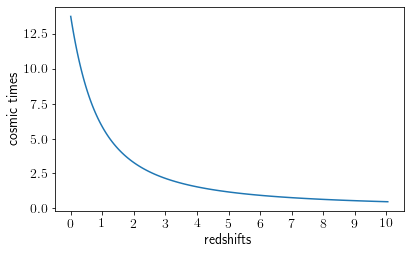

In [33]:
from astropy.cosmology import FlatLambdaCDM, z_at_value
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.31)
cosmic_times = cosmo.age(redshifts).value
plt.plot(redshifts, cosmic_times)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("redshifts")
plt.ylabel("cosmic times")
plt.savefig("redshifts_vs_ctimes.png")

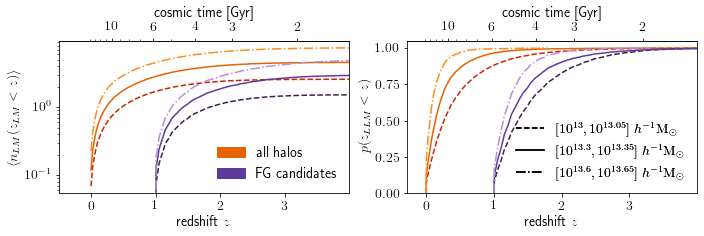

In [103]:
##################
# Cum mean n lms #
##################
plt.rcParams.update({
    'font.size': 14,
})

xright = 4
z_end = None # In case you want to zoom in
color_labels = ["all halos", "FG candidates"]#, "QH candidates"]
oranges = ["#CC2200", "#E66100", "#FF8C1A"]
purples = ["#3C1C4A", "#5D3A9B", "#B98CD9"]
greens = ["#00755F", "#00805D", "#00805D"]
colors = [oranges, purples]#, greens]
linestyles = ['--', '-', '-.']
linestyle_labels = [r"$[10^{13}, 10^{13.05}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.3}, 10^{13.35}]$ $h^{-1}\mathrm{M}_\odot$", r"$[10^{13.6}, 10^{13.65}]$ $h^{-1}\mathrm{M}_\odot$"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3.5))
ax = axes[0]
bin_legend_handles = []
for i, (this_mask, this_catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks], [forest, fg_forest], [progenitor_array, fg_progenitor_array])):
#for i, (this_mask, this_catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks, qh_masks], [forest, fg_forest, fg_forest], [progenitor_array, fg_progenitor_array, fg_progenitor_array])):
    target_idx = [np.nonzero(this_mask[0])[0], np.nonzero(this_mask[1])[0], np.nonzero(this_mask[2])[0]]
    binned_mainbranch_index, binned_mainbranch_masses = help_func_haccytrees.get_binned_branches(target_idx, this_catalog)
    binned_mainbranch_mergers = help_func_haccytrees.get_binned_mainbranch_mergers(this_catalog, this_progenitor_array, binned_mainbranch_index)
    binned_major_mergers = help_func_haccytrees.get_binned_major_mergers(binned_mainbranch_mergers)
    binned_avg_cum_mms = help_func_haccytrees.calc_binned_avg_cum_mms(binned_major_mergers) # Why did this previously say "long"?
    
    # Loop over mass bins; plot
    these_colors = colors[i] # colors for each fossil status
    for j, this_bin in enumerate(binned_avg_cum_mms):
        if i == 2 and j == 2:
            break
        current_color = these_colors[j]
        current_linestyle = linestyles[j]
        current_label = linestyle_labels[j]
        ax.plot(np.flip(redshifts), this_bin, linestyle = current_linestyle, color = current_color, label = current_label)
    
        if j == 1:
            bin_legend_handles.append(mpatches.Patch(color = current_color, label = color_labels[i])) # For mass bins

# Cosmetics
ax.set_xlabel(r"redshift $z$")
ax.set_xlim(right = xright)
ax.set_xticks(np.arange(xright))
#ax.set_xticklabels([f'{z:d}' for z in range(xright)]) # somehow not necessary?
ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_ylabel(r"$\langle n_{LM}(z_{LM} < z) \rangle$")
ax.set_yscale('log')
    
# Second x-axis
sax = ax.secondary_xaxis('top', functions=(forward, inverse))
major_ticks = [1, 2, 3, 4, 6, 10]
minor_ticks = [5, 7, 8, 9, 11, 12, 13, 14]
sax.set_xticks(major_ticks, minor=False)
sax.set_xticks(minor_ticks, minor=True)
sax.set_xticklabels([f'{t:d}' for t in major_ticks])
sax.set_xlabel("cosmic time [Gyr]")
sax.xaxis.set_major_formatter(ScalarFormatter())

ax.legend(handles = bin_legend_handles, loc = "lower right", frameon = False)
ax.margins(x=0.025)

########################
# Probability of z_LLM #
########################

ax = axes[1]
z_end = None # In case you want to zoom in
#bin_legend_handles = []
for i, (this_mask, catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks], [forest, fg_forest], [progenitor_array, fg_progenitor_array])):
#for i, (this_mask, catalog, this_progenitor_array) in enumerate(zip([halo_masks, fg_masks, qh_masks], [forest, fg_forest, fg_forest], [progenitor_array, fg_progenitor_array, fg_progenitor_array])):
    
    # Get lmms for all entries in this mask
    this_idx = [np.nonzero(this_mask[0])[0], np.nonzero(this_mask[1])[0], np.nonzero(this_mask[2])[0]]
    mainbranch_index, mainbranch_mass = help_func_haccytrees.get_binned_branches(this_idx, catalog)
    binned_mainbranch_mergers = help_func_haccytrees.get_binned_mainbranch_mergers(catalog, this_progenitor_array, mainbranch_index)
    binned_major_mergers = help_func_haccytrees.get_binned_major_mergers(binned_mainbranch_mergers)
    binned_lmms = help_func_haccytrees.get_binned_lmms(binned_mainbranch_mergers)
    fgs, rugs, mrich = help_func_haccytrees.find_binned_specials(forest, mainbranch_index, binned_major_mergers, binned_lmms, this_idx)
    
    # Loop over each mass bin, plot
    these_colors = colors[i]
    for j, this_bin in enumerate(binned_lmms):
        if i == 2 and j == 2:
            break
        current_color = these_colors[j]
        current_linestyle = linestyles[j]
        current_label = linestyle_labels[j]
        
        # Calculate cdf
        this_bin = this_bin[this_bin >= 0] # Remove any negative values (coming from rugs)
        data_sorted = np.sort(this_bin) # Should automatically sort along the last axis
        hist_keys = np.concatenate(([0] if i == 0 else [1], [key for key, group in groupby(data_sorted)])) # Redshift values
        hist_values = np.concatenate(([0], [len(list(group)) for key, group in groupby(data_sorted)])) # Count of each redshift value
        cum_probs = np.cumsum(hist_values) / len(this_bin)

        if z_end is not None:
            hist_keys = np.append(hist_keys, z_end)
            cum_probs = np.append(cum_probs, cum_probs[-1])

        # Plot cdf
        ax.plot(hist_keys, cum_probs, color = current_color, linestyle = current_linestyle, label = current_label)
                    
    # Add legend for mass bins
    if i == 0:
        fake_lines = [ax.plot([],[], linestyle = linestyle, c = 'k')[0] for linestyle in linestyles]
        leg1 = ax.legend(fake_lines, linestyle_labels, loc = 'lower right', frameon = False)#, fontsize = 13)
        ax.add_artist(leg1)
        
    # Accessorize
    ax.set_ylabel(r"$p(z_{LLM} < z)$")
    ax.set_xlabel(r"redshift $z$")
    #ax.set_xscale("symlog", linthresh = 1, linscale = 0.4)
    
# Unnecessarily Complicated Tick Marks
ax.set_xlim(right = xright)
ax.set_xticks(np.arange(xright))
#ax.set_xticklabels([f'{z:d}' for z in range(6)]) # somehow not necessary?
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_ylim(bottom = 0)

sax = ax.secondary_xaxis('top', functions=(forward, inverse))
major_ticks = [1, 2, 3, 4, 6, 10]
minor_ticks = [5, 7, 8, 9, 11, 12, 13, 14]
sax.set_xticks(major_ticks, minor=False)
sax.set_xticks(minor_ticks, minor=True)
sax.set_xticklabels([f'{t:d}' for t in major_ticks])
sax.set_xlabel("cosmic time [Gyr]")
sax.xaxis.set_major_formatter(ScalarFormatter())
#ax.legend(handles = bin_legend_handles, loc = "center right", bbox_to_anchor = (1, 0.6), frameon = False)

fig.show()
fig.tight_layout()
fig.savefig("full_lj_plots/lms_llms_lin_zoom.pdf", bbox_inches='tight', pad_inches=0)
# How to extend the right plots down to y = 0?

## Luminous merger rates
The rate of luminous mergers as a function of redshift, subdivided according to z=0 halo mass

In [ ]:
sim = haccytrees.Simulation.simulations['LastJourney']
zsteps = sim.step2z(np.array(sim.cosmotools_steps))
dz = zsteps[:-1] - zsteps[1:]

for i, (this_mask, this_forest, this_progenitor_array) in enumerate(zip([halo_masks[0], fg_masks[0]], [forest, fg_forest], [progenitor_array, fg_progenitor_array])):
    this_idx = np.nonzero(this_mask)[0]
    mainbranch_index, mainbranch_mass = help_func_haccytrees.get_branches(this_idx, this_forest)
    mergers_table = help_func_haccytrees.mainbranch_mergers(this_forest, this_progenitor_array, mainbranch_index)
    luminous_mergers_table = help_func_haccytrees.get_binned_major_mergers(mergers_table)
    